## This is a test notebook

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'png'

### Load Data

In [2]:
df = pd.read_csv('output/merged_covid_df.csv', index_col=0)
df = df.assign(cases_percap=df['cases']/df['POP_ESTIMATE_2018'])
df = df.assign(log_pop = np.round(np.log10(df['POP_ESTIMATE_2018']), 2))

Normally you see inverse correlation between income & poverty or unemployment

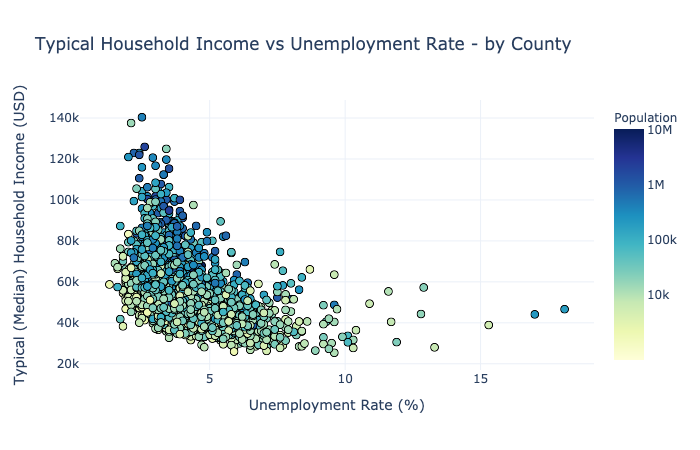

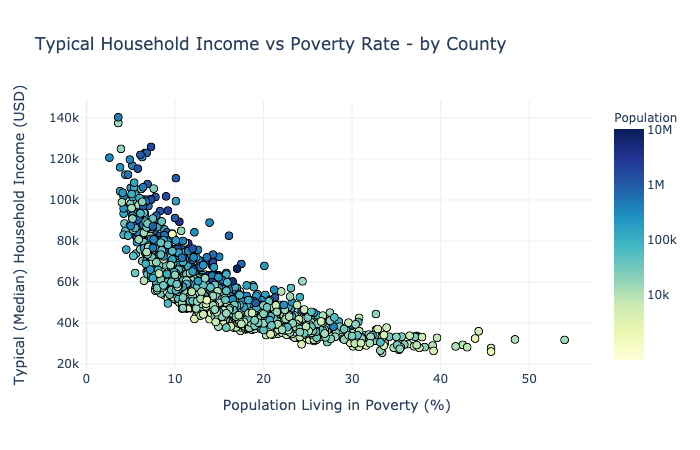

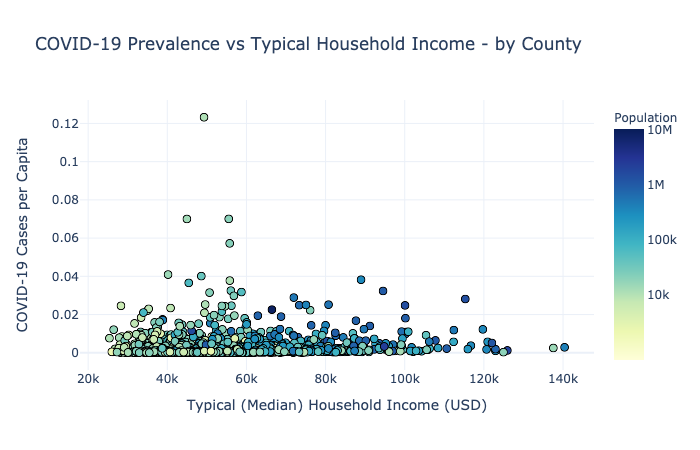

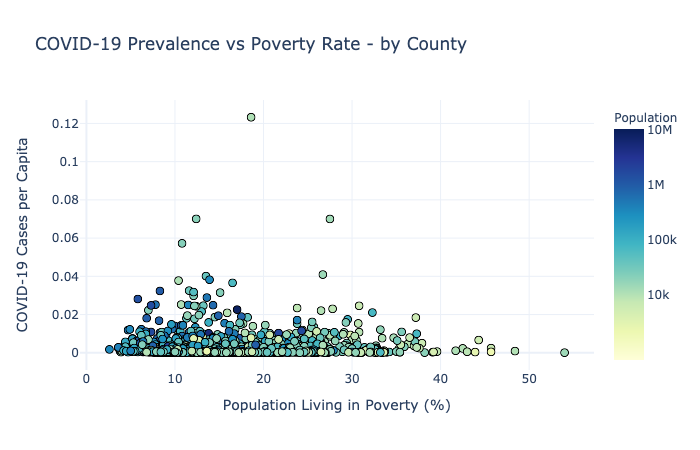

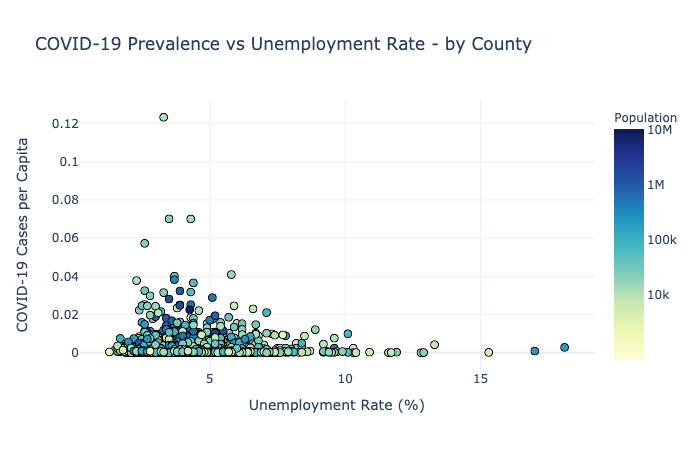

In [3]:
# Normally you see inverse correlation between income & poverty or unemployment
fig = px.scatter(df, x='Unemployment_rate_2018', y='Median_Household_Income_2018', title='Typical Household Income vs Unemployment Rate - by County',
                 hover_name='county', hover_data=['state', 'POP_ESTIMATE_2018'],
                 labels={
                     'log_pop': 'Population (log 10)', 'Unemployment_rate_2018': 'Unemployment Rate (%)',
                     'Median_Household_Income_2018': 'Typical (Median) Household Income (USD)', 'state': 'State',
                     'POP_ESTIMATE_2018': 'Population',
                 },
                 color='log_pop', color_continuous_scale=px.colors.sequential.YlGnBu, template='plotly_white',
                 height=600, width=900)
fig.update_layout(coloraxis_colorbar=dict(
    title="Population",
    tickvals=[4, 5, 6, 7],
    ticktext=["10k", "100k", "1M", "10M"],
))
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()


fig = px.scatter(df, x='PCTPOVALL_2018', y='Median_Household_Income_2018', title='Typical Household Income vs Poverty Rate - by County',
                 hover_name='county', hover_data=['state', 'POP_ESTIMATE_2018'],
                 labels={
                     'log_pop': 'Population (log 10)', 'PCTPOVALL_2018': 'Population Living in Poverty (%)',
                     'Median_Household_Income_2018': 'Typical (Median) Household Income (USD)', 'state': 'State',
                     'POP_ESTIMATE_2018': 'Population',
                 },
                 color='log_pop', color_continuous_scale=px.colors.sequential.YlGnBu, template='plotly_white',
                 height=600, width=900)
fig.update_layout(coloraxis_colorbar=dict(
    title="Population",
    tickvals=[4, 5, 6, 7],
    ticktext=["10k", "100k", "1M", "10M"],
))
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()



# But, take a look at these:
# Cases per capita vs income
fig = px.scatter(df, x='Median_Household_Income_2018', y='cases_percap', title='COVID-19 Prevalence vs Typical Household Income - by County',
                 hover_name='county', hover_data=['state', 'POP_ESTIMATE_2018'],
                 labels={
                     'log_pop': 'Population (log 10)', 'cases_percap': 'COVID-19 Cases per Capita',
                     'Median_Household_Income_2018': 'Typical (Median) Household Income (USD)', 'state': 'State',
                     'POP_ESTIMATE_2018': 'Population',
                 },
                 color='log_pop', color_continuous_scale=px.colors.sequential.YlGnBu, template='plotly_white',
                 height=600, width=900)
fig.update_layout(coloraxis_colorbar=dict(
    title="Population",
    tickvals=[4, 5, 6, 7],
    ticktext=["10k", "100k", "1M", "10M"],
))
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

# Much of high cases/capita counties are lower income counties. Take a look at stats showing how many of counties with 0.2+ infections per county are at lower income

# Vs poverty
fig = px.scatter(df, x='PCTPOVALL_2018', y='cases_percap', title='COVID-19 Prevalence vs Poverty Rate - by County',
                 hover_name='county', hover_data=['state', 'POP_ESTIMATE_2018'],
                 labels={
                     'log_pop': 'Population (log 10)', 'cases_percap': 'COVID-19 Cases per Capita',
                     'PCTPOVALL_2018': 'Population Living in Poverty (%)', 'state': 'State',
                     'POP_ESTIMATE_2018': 'Population',
                 },
                 color='log_pop', color_continuous_scale=px.colors.sequential.YlGnBu, template='plotly_white',
                 height=600, width=900)
fig.update_layout(coloraxis_colorbar=dict(
    title="Population",
    tickvals=[4, 5, 6, 7],
    ticktext=["10k", "100k", "1M", "10M"],
))
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()
# The hard-hit areas are low poverty rate

# Vs unemployment
fig = px.scatter(df, x='Unemployment_rate_2018', y='cases_percap', title='COVID-19 Prevalence vs Unemployment Rate - by County',
                 hover_name='county', hover_data=['state', 'POP_ESTIMATE_2018'],
                 labels={
                     'log_pop': 'Population (log 10)', 'cases_percap': 'COVID-19 Cases per Capita',
                     'Unemployment_rate_2018': 'Unemployment Rate (%)', 'state': 'State',
                     'POP_ESTIMATE_2018': 'Population',
                 },
                 color='log_pop', color_continuous_scale=px.colors.sequential.YlGnBu, template='plotly_white',
                 height=600, width=900)
fig.update_layout(coloraxis_colorbar=dict(
    title="Population",
    tickvals=[4, 5, 6, 7],
    ticktext=["10k", "100k", "1M", "10M"],
))
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()
# The hard-hit areas are low unemployment

# ========== TAKE A LOOK AT THE STATS FOR PLACES WITH 0.1%+ COVID PER CAPITA

df = df.assign(high_inf = df.cases_percap > 0.1)